In [76]:
import pandas as pd

In [77]:
import pandas as pd
import sys
from io import StringIO

COMBINED_FILE_PATH = '../../../volza/magnesium/magnesium_volza_ais_price.csv'

COUNTRY_CODES = ['CN' 'BE' 'DE' 'NL' 'SE' 'TR' 'VN' 'MX' 'US' 'IL' 'CL' 'TW' 'ES' 'PL'
 'RU' 'IN' 'FR' 'GB' 'BG' 'EE' 'IT' 'SI' 'FI' 'IE' 'DK' 'PT' 'LV' 'LT'
 'HR' 'JP' 'BR' 'MA' 'GH' 'GR' 'RO' 'PA' 'EG' 'CY' 'HK']

# Redirect stderr to capture the warnings
old_stderr = sys.stderr
sys.stderr = StringIO()

try:
    combined_df = pd.read_csv(COMBINED_FILE_PATH, delimiter='|', on_bad_lines='warn')
    # combined_df = combined_df(combined_df['origin_country_code'].isin('CN'))
except Exception as e:
    print(f"Error reading the CSV file: {e}")
finally:
    # Reset stderr
    sys.stderr.seek(0)
    warnings = sys.stderr.read()
    sys.stderr = old_stderr

# Count the number of bad lines
bad_lines_count = warnings.count('Skipping line')
print(f"Number of bad lines skipped: {bad_lines_count}")

# Continue with your processing if the file is read successfully
if 'combined_df' in locals():
    combined_df['Date'] = pd.to_datetime(combined_df['Date'])
    combined_df.sort_values('Date', inplace=True)

    # Set 'Date' as the index
    combined_df.set_index('Date', inplace=True)
    
combined_df = combined_df.groupby('origin_country')    
combined_df.head(2)


Number of bad lines skipped: 1


,mmsi,arrival_time,arrival_port,arrival_area,departure_port,departure_time,departure_area,origin_country_code,destination_country_code,origin_country,...,Container TEU,Freight Term,Marks Number,HS Product Description,Gross Weight,Consignee Address,Shipper Address,Notify Party Address,Country Name,Magnesium Spot Price
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-24 00:00:00+05:30,273000019,2021-03-24T17:48:15.000+05:30,RULED,StPetersburg,CNXMN,2021-02-16T22:15:39.000-07:00,Xiamen,CN,RU,China,...,-,-,-,"UNWROUGHT MAGNESIUM, CONTAINING >= 99,8% BY WE...",20060.0,NaN,NaN,NaN,Russia T3 Import,15350.0
2021-12-28 00:00:00+05:30,444000000,2021-12-28T09:34:14.840+05:30,INBOM,Mumbai,CNDLC,2021-12-27T20:48:44.560-07:00,Dalian,CN,IN,China,...,-,-,-,"Magnesium and articles thereof, including wast...",0.0,99/2/1 & 9 MADHUBAN INDUSTRIAL ESTATE MADHUBAN...,22 MALACCA STREET # 04-03 RD CAPITA L BUILDING...,NaN,India T3 Import,48500.0
2022-01-01 00:00:00+05:30,244710904,2022-01-01T22:31:26.680+05:30,NLAMS,Amsterdam,BEANR,2021-12-29T19:05:59.790-07:00,Antwerp,BE,NL,Belgium,...,-,-,-,NaN,0.0,NaN,NaN,NaN,Netherlands T1 Import,NaN
2022-01-01 00:00:00+05:30,244670101,2022-01-01T21:55:03.000+05:30,BEANR,Antwerp,NLRTM,2021-12-31T18:25:09.000-07:00,Rotterdam,NL,BE,Netherlands,...,-,-,-,NaN,0.0,NaN,NaN,NaN,Netherlands T1 Export,NaN
2022-01-01 00:00:00+05:30,244670101,2022-01-01T21:55:03.000+05:30,BEANR,Antwerp,NLRTM,2021-12-31T18:25:09.000-07:00,Rotterdam,NL,BE,Netherlands,...,-,-,-,NaN,0.0,NaN,NaN,NaN,Belgium T1 Import,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-09 00:00:00+05:30,253588000,2022-07-09T13:15:01.000+05:30,USEWR,"Newark,NJ",EGSCN,2022-06-19T16:45:01.000-07:00,Suez Canal,EG,US,Egypt,...,0,-,NO MARKS....,NaN,19262.0,"5469 NW 59TH PLACETAMARAC, FL, 33329USANORMAN....",DIEDRICH-SPECKMANN-STRASSE 5F|LILIENTHAL NIEDE...,"5469 NW 59TH PLACETAMARAC, FL, 33329USANORMAN....",USA T3+ Import,NaN
2022-07-09 00:00:00+05:30,253588000,2022-07-09T13:15:01.000+05:30,USEWR,"Newark,NJ",EGSCN,2022-06-19T16:45:01.000-07:00,Suez Canal,EG,US,Egypt,...,0,-,NO MARKS.....,NaN,19647.0,"5469 NW 59TH PLACETAMARAC, FL, 33329USANORMAN....",DIEDRICH-SPECKMANN-STRASSE 5F|LILIENTHAL NIEDE...,"5469 NW 59TH PLACETAMARAC, FL, 33329USANORMAN....",USA T3+ Import,NaN
2022-08-01 00:00:00+05:30,636021515,2022-08-01T01:30:29.520+05:30,NLRTM,Rotterdam,CYVAS,2022-07-17T10:45:00.000-07:00,Vasilikos,CY,NL,Cyprus,...,-,-,-,NaN,0.0,NaN,NaN,NaN,Netherlands T1 Import,22950.0


### **Analysis**

#### **1. Time Series**

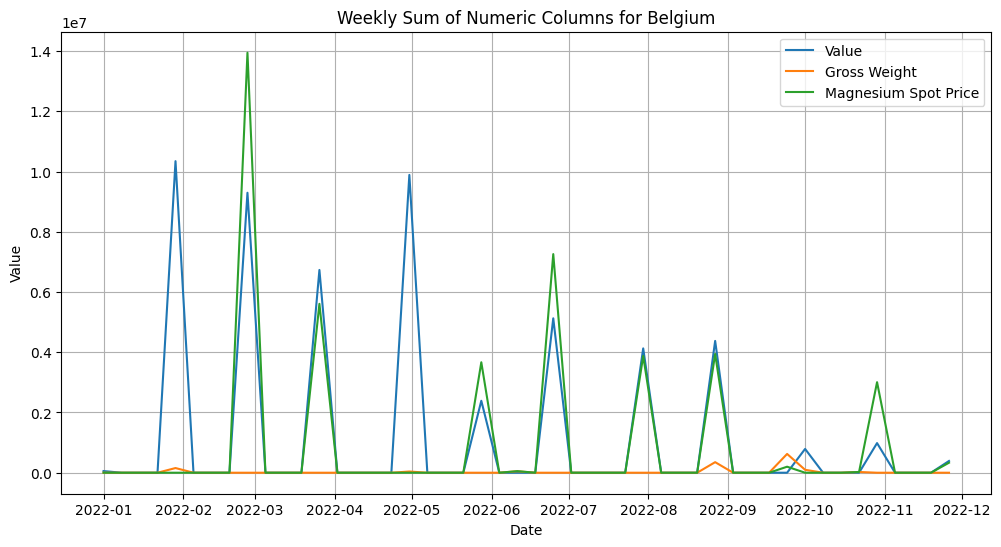

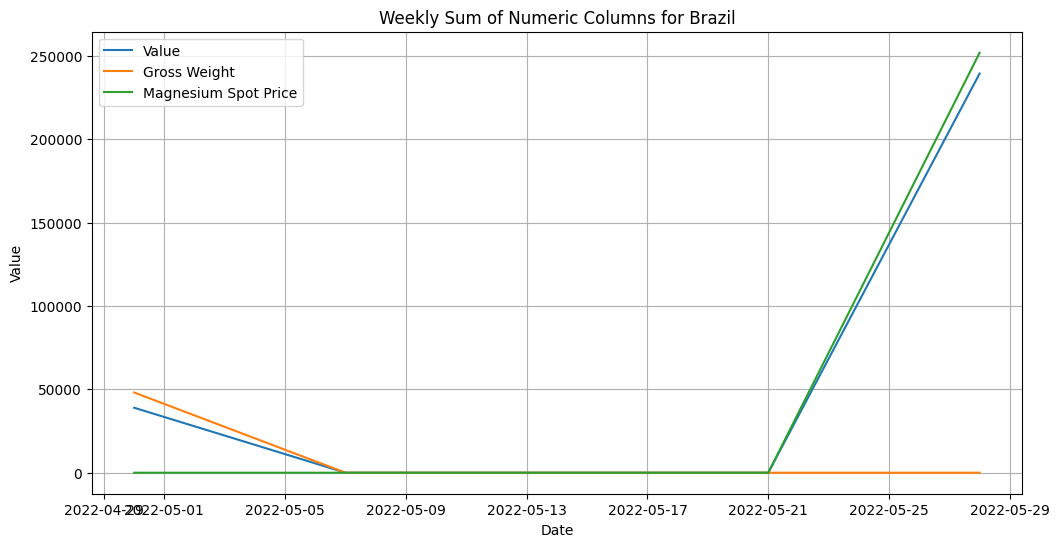

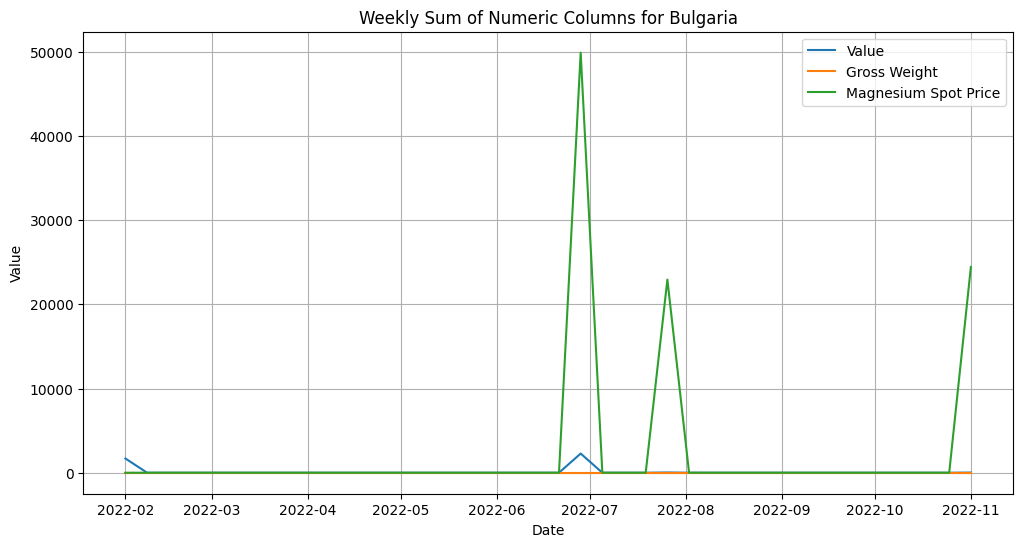

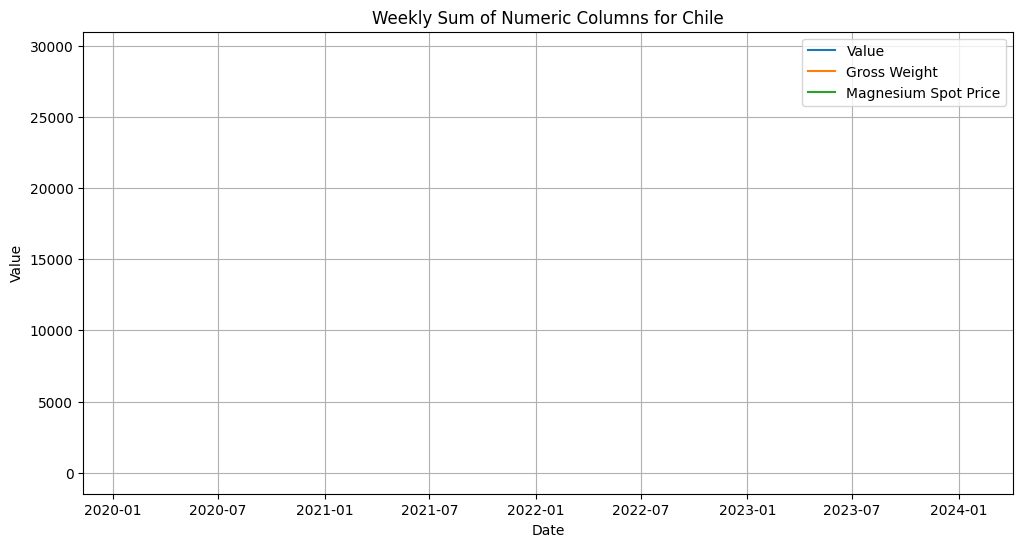

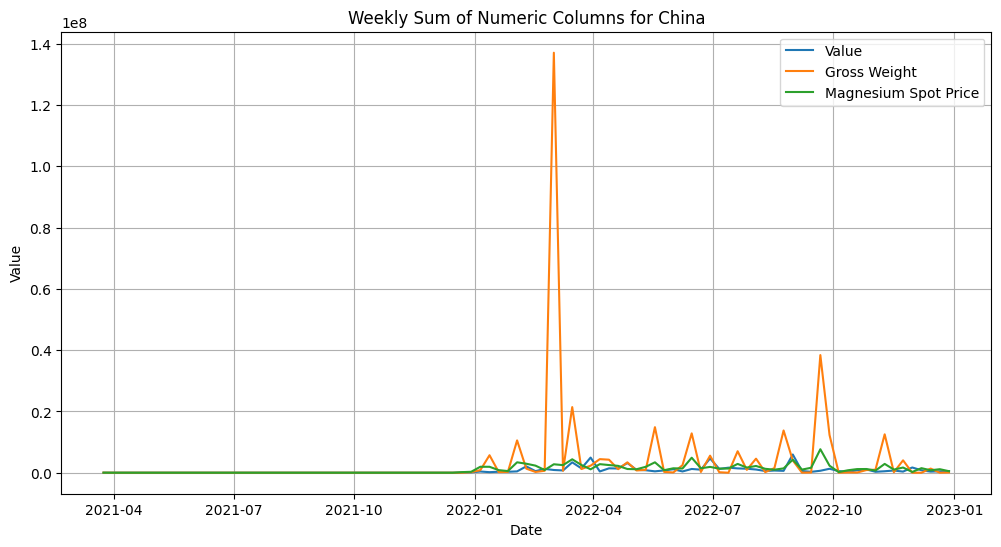

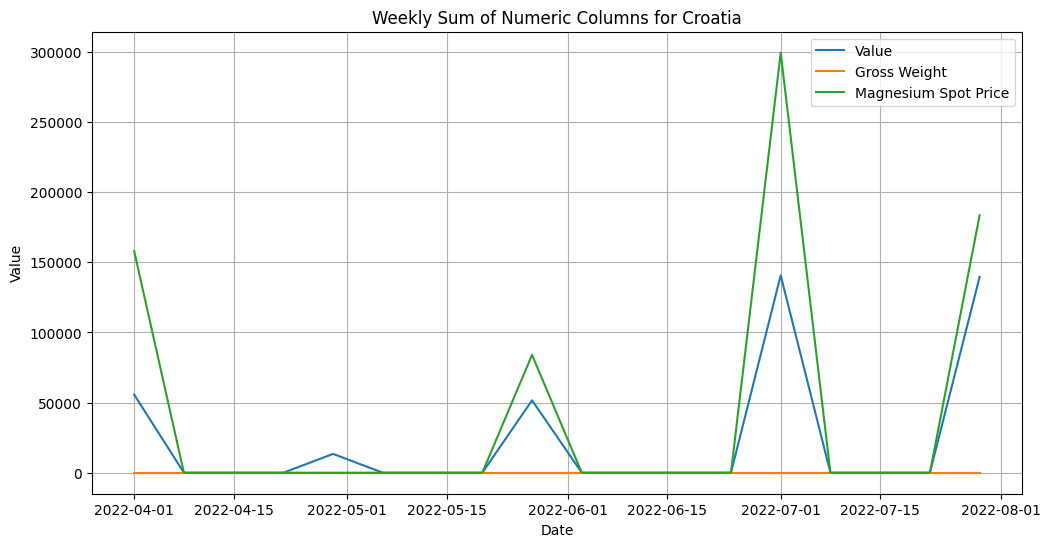

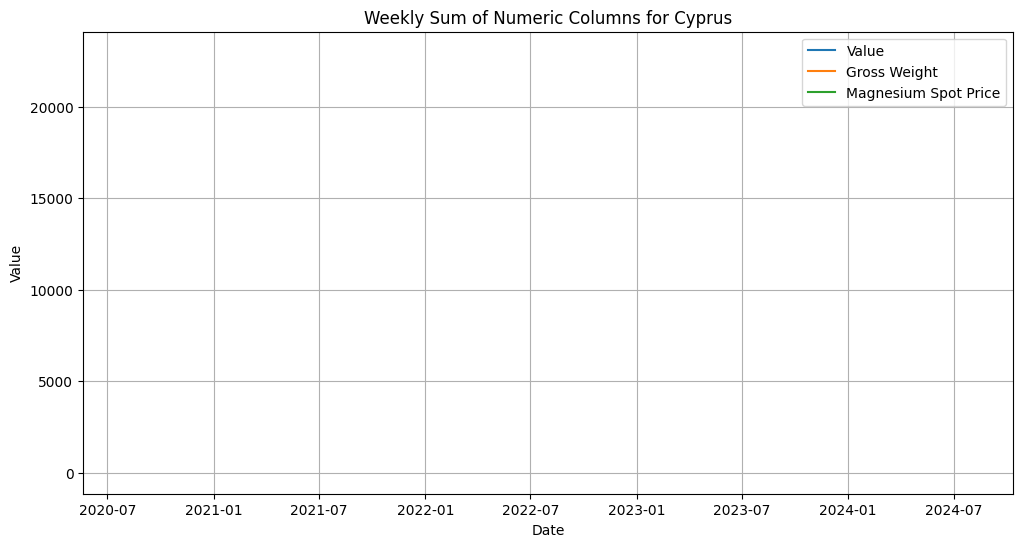

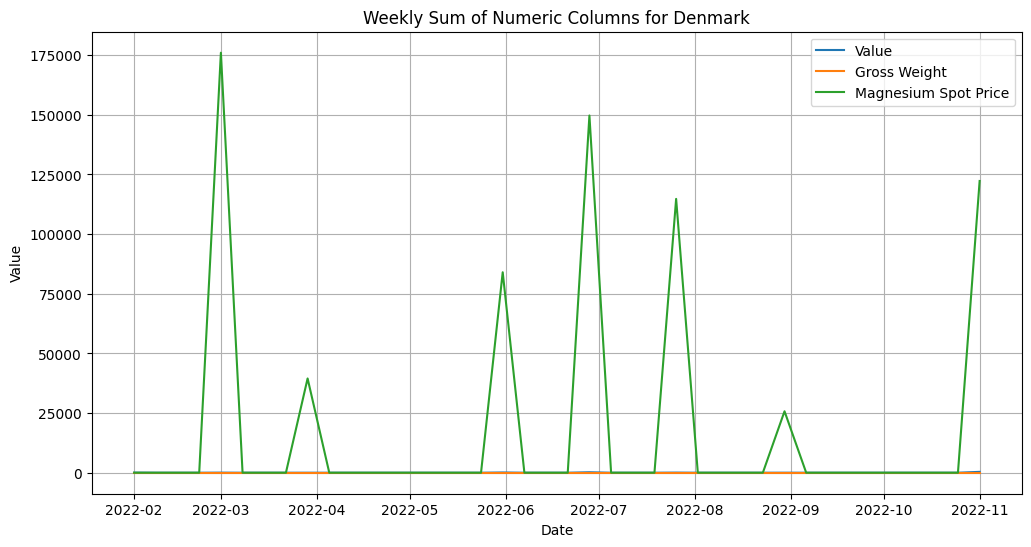

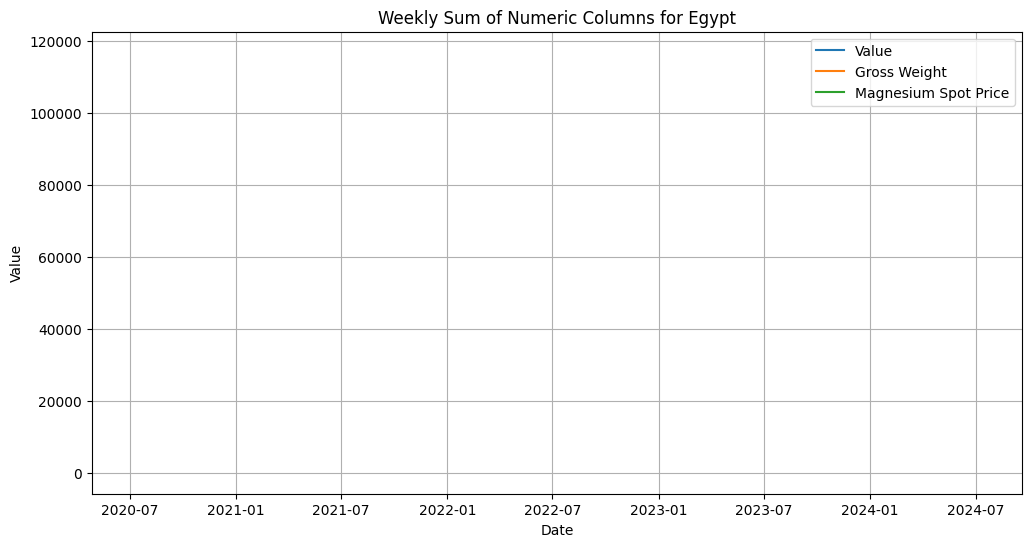

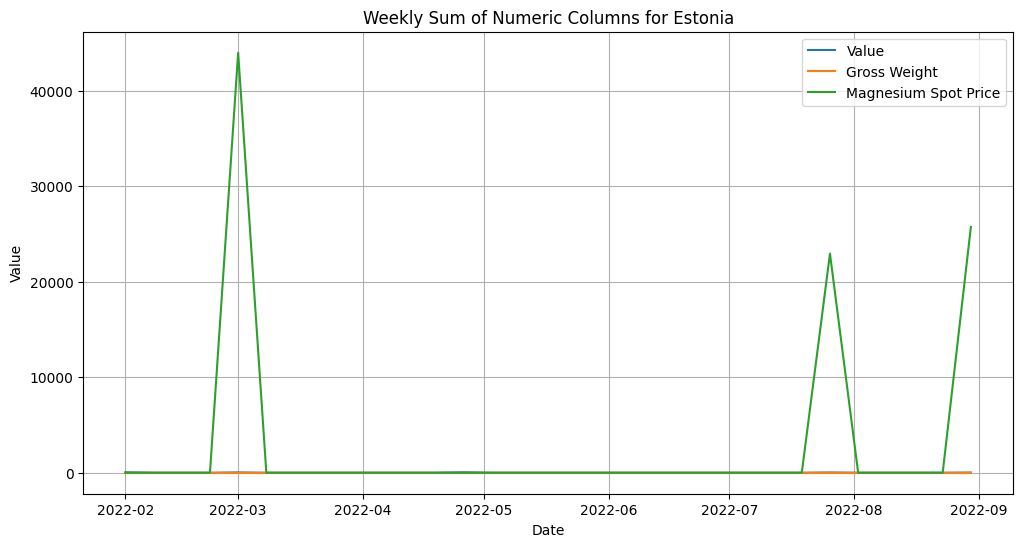

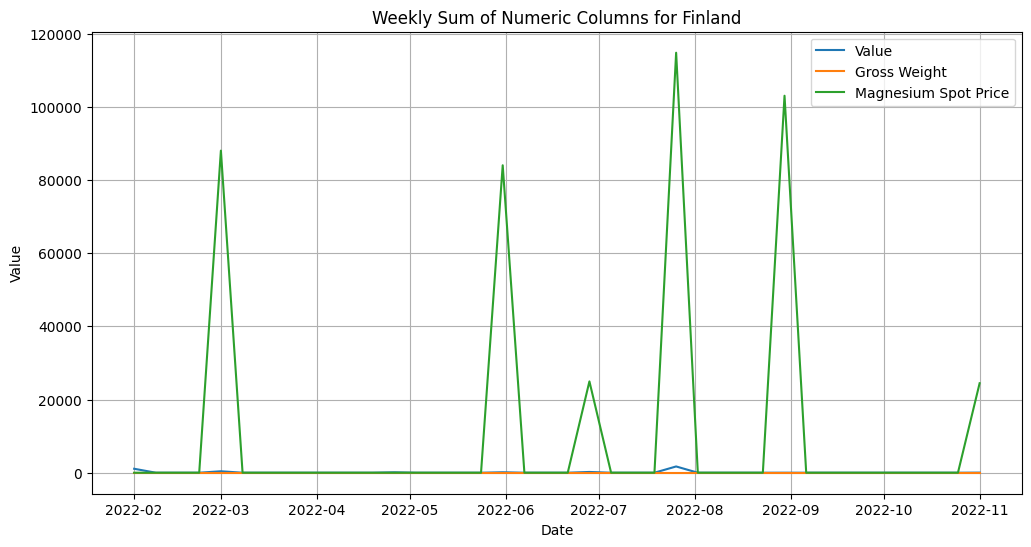

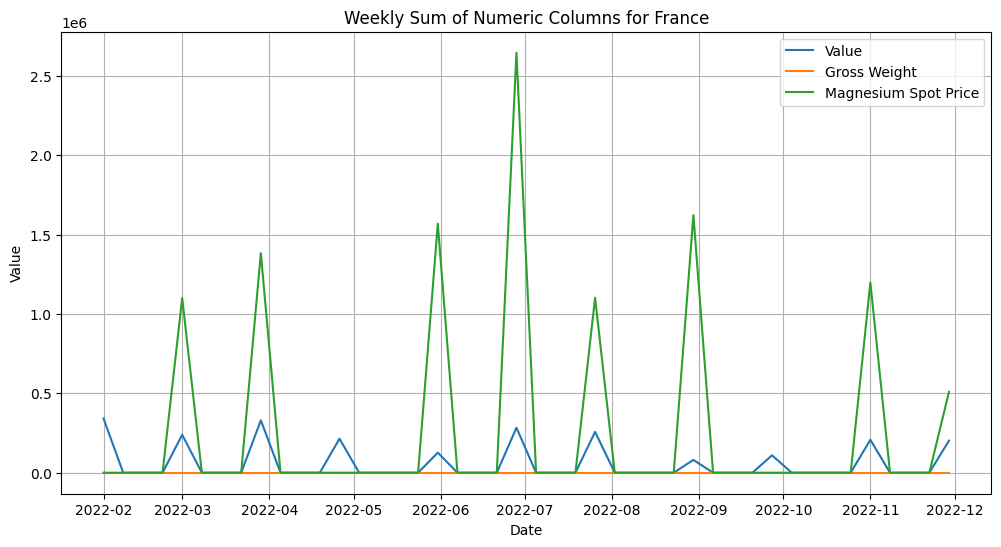

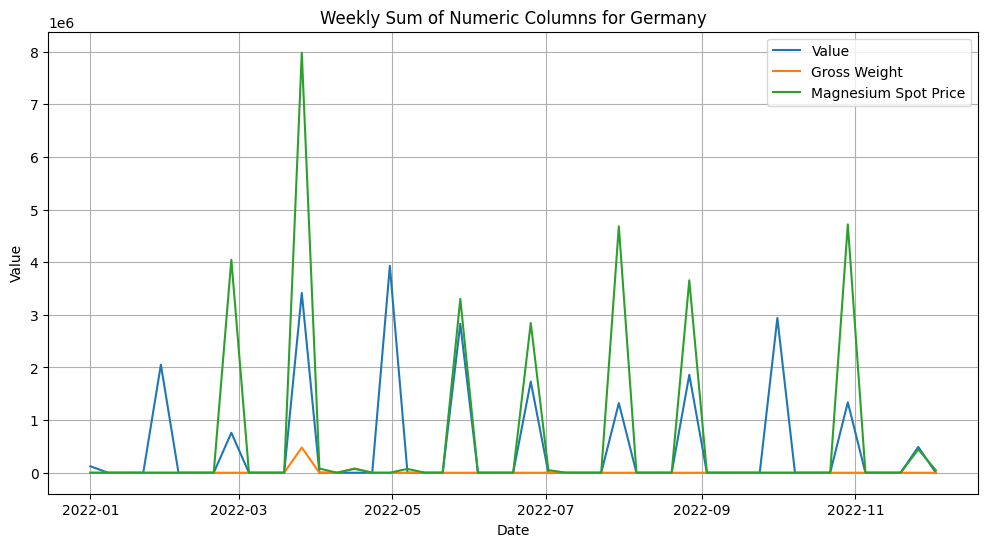

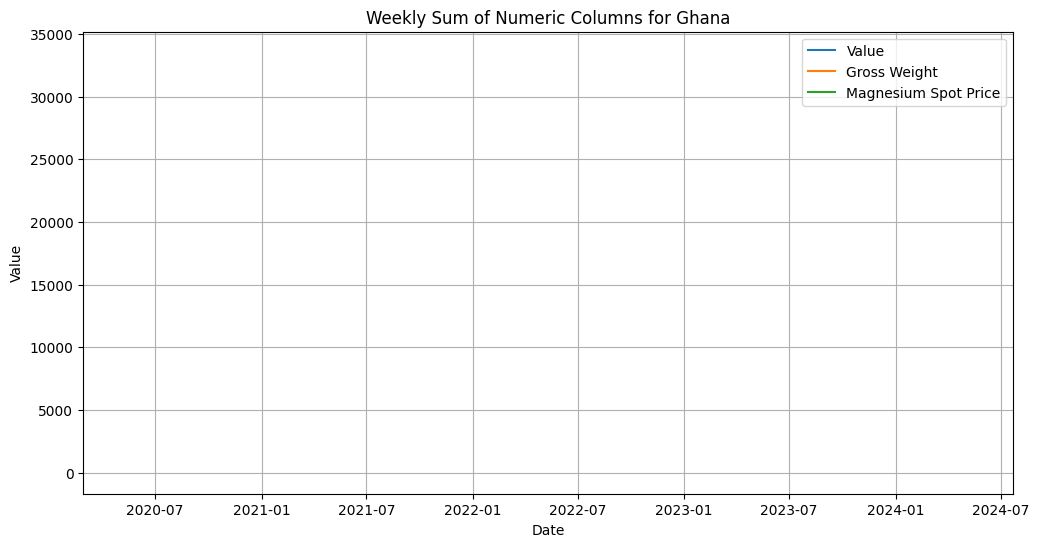

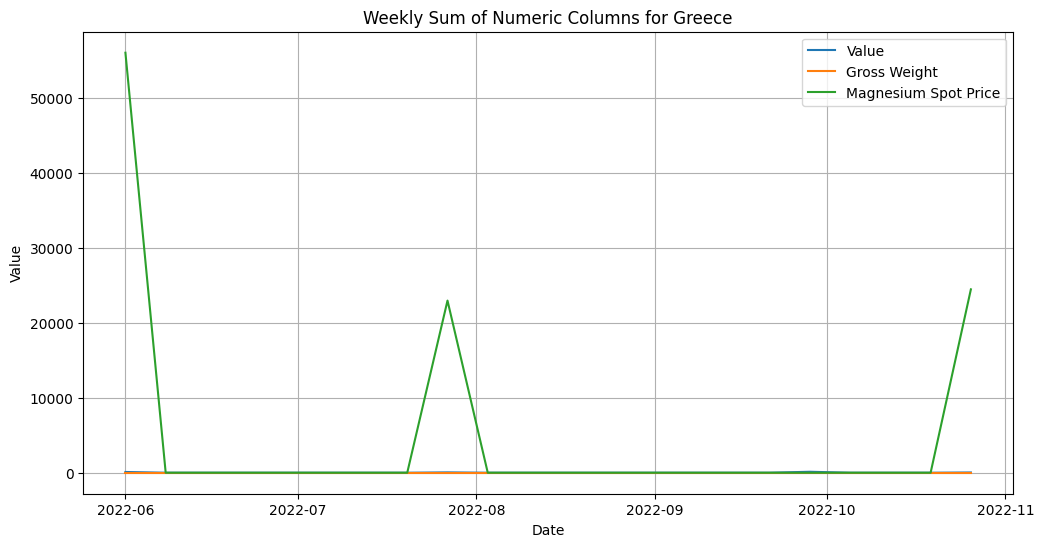

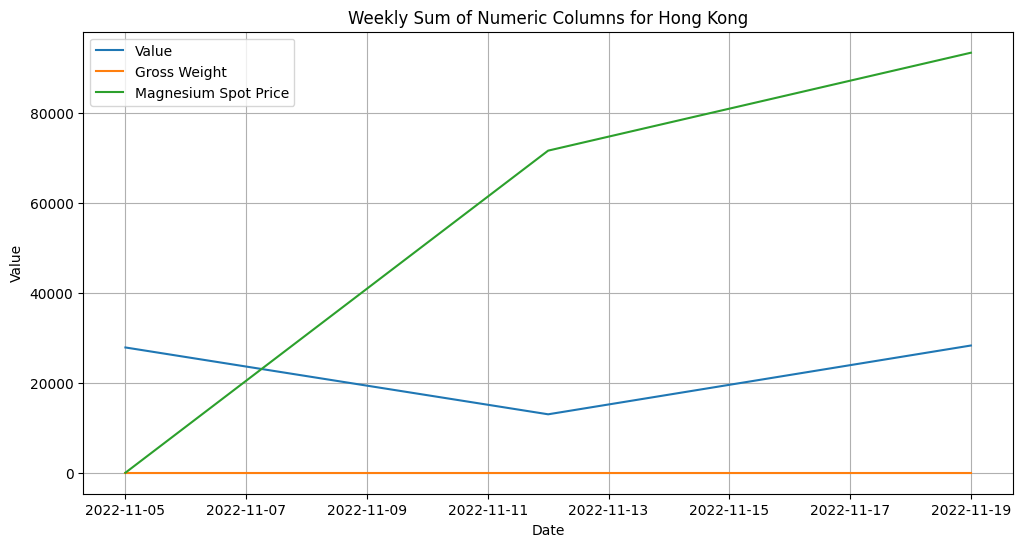

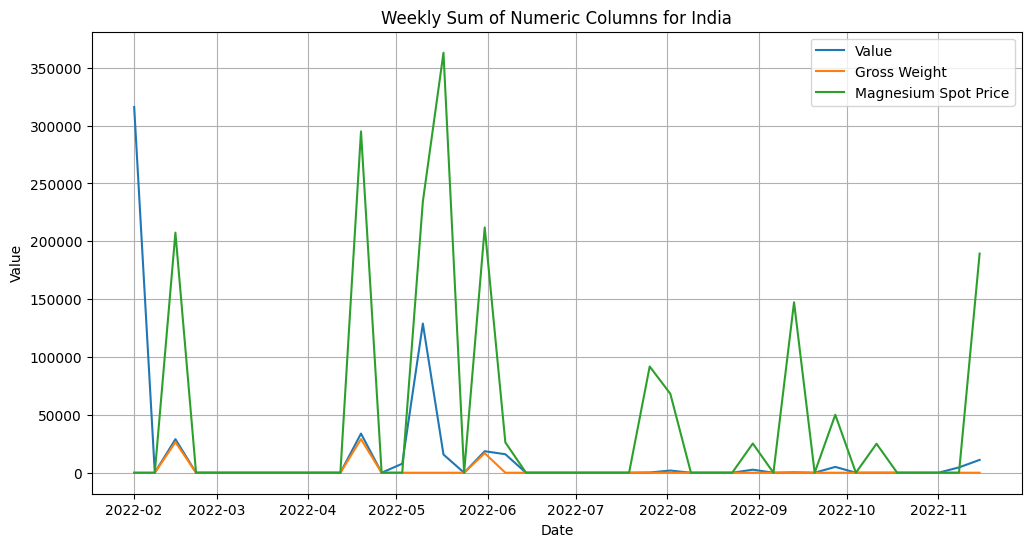

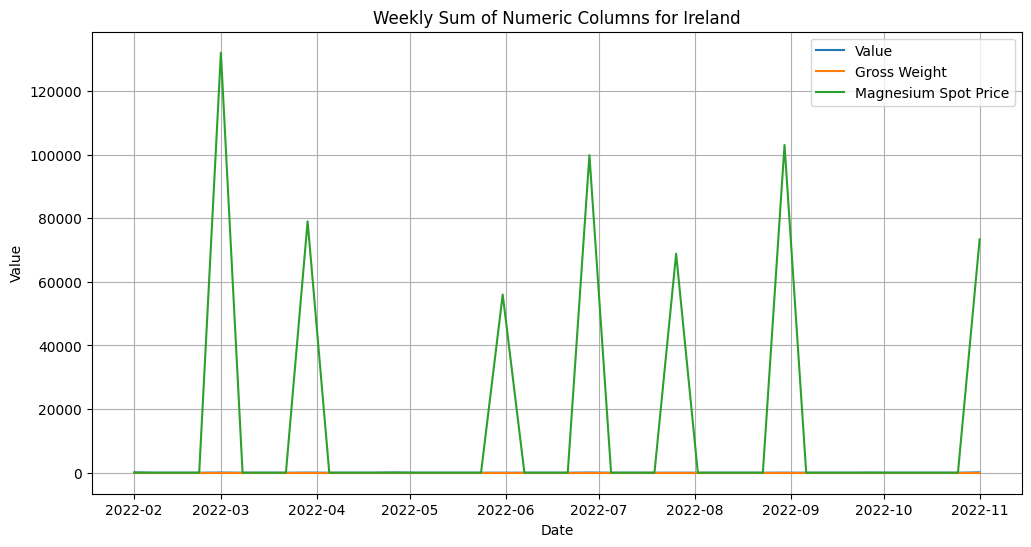

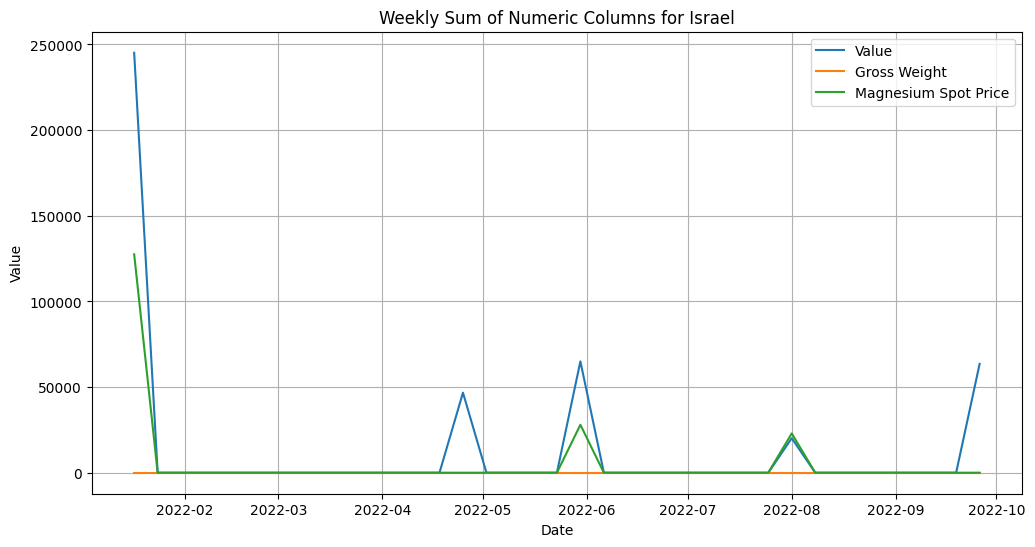

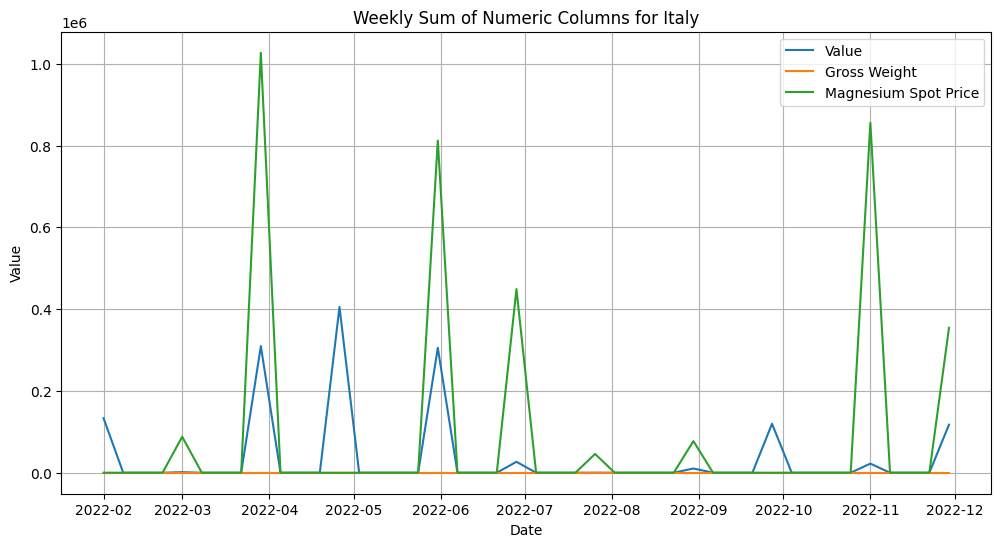

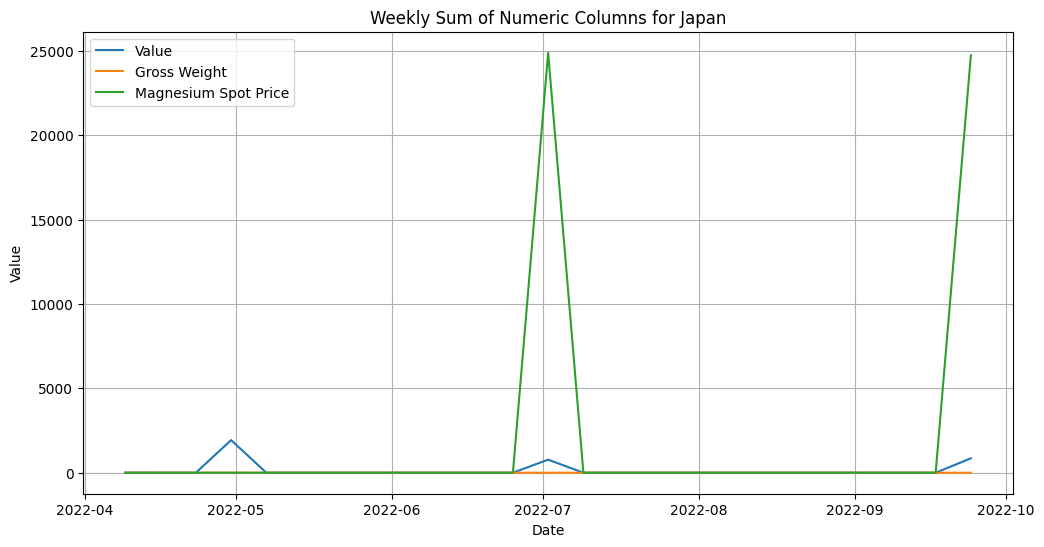

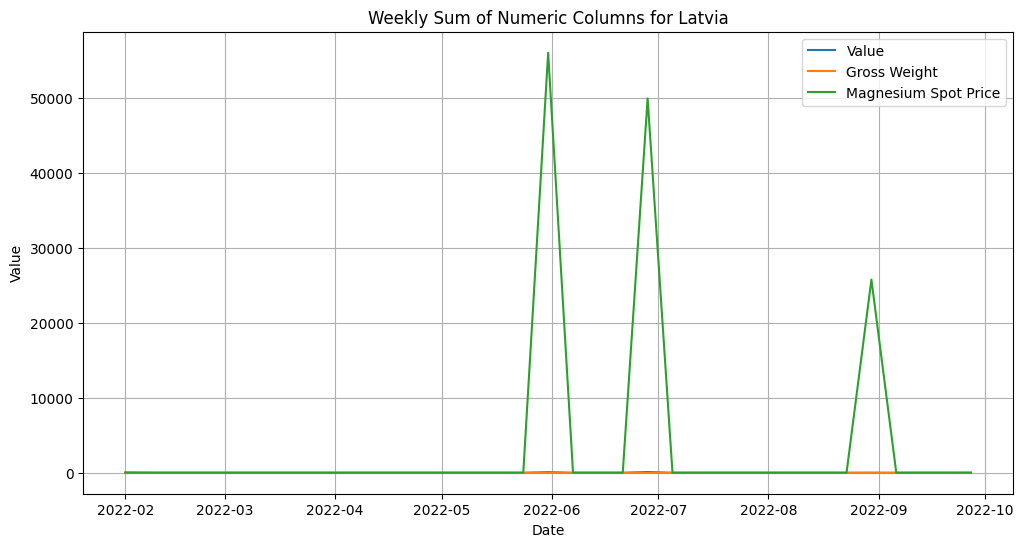

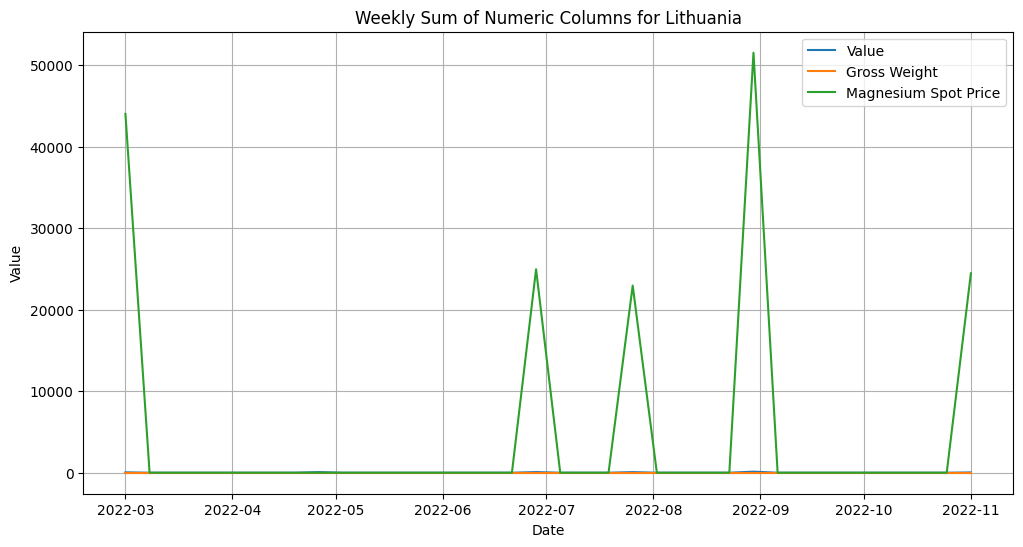

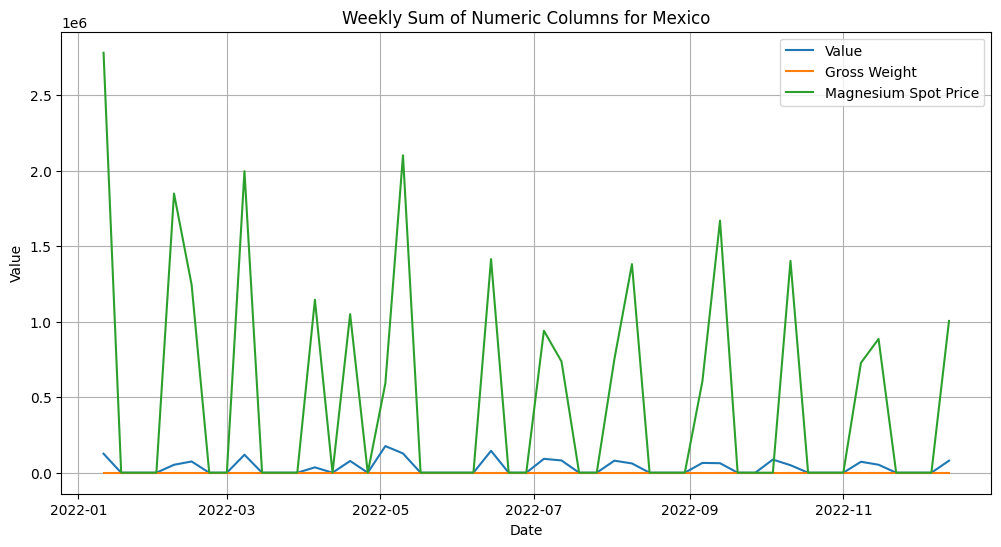

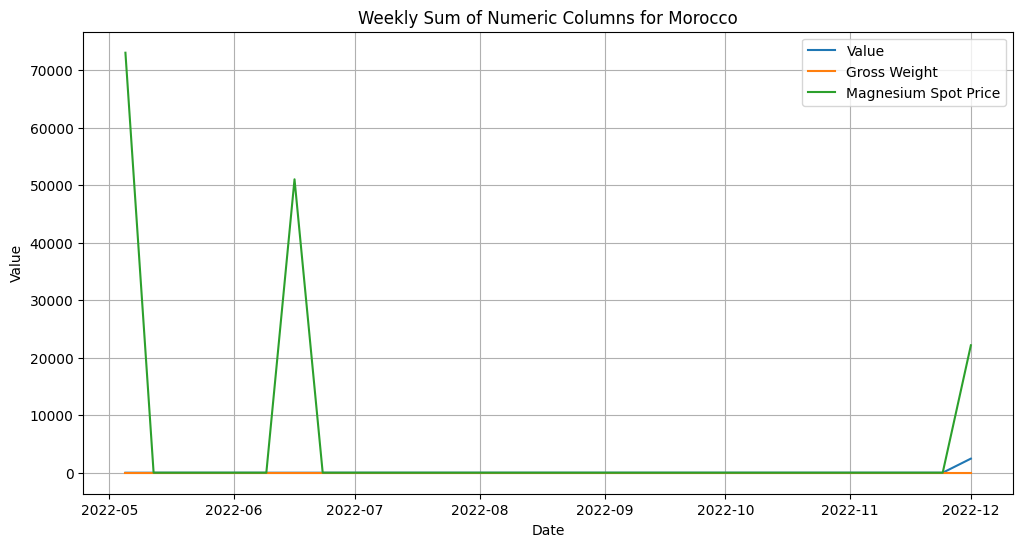

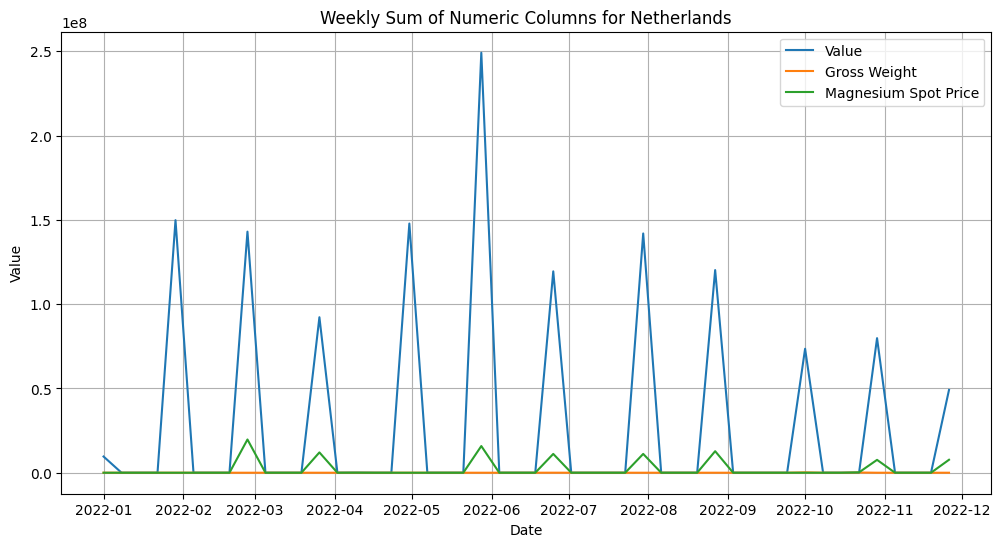

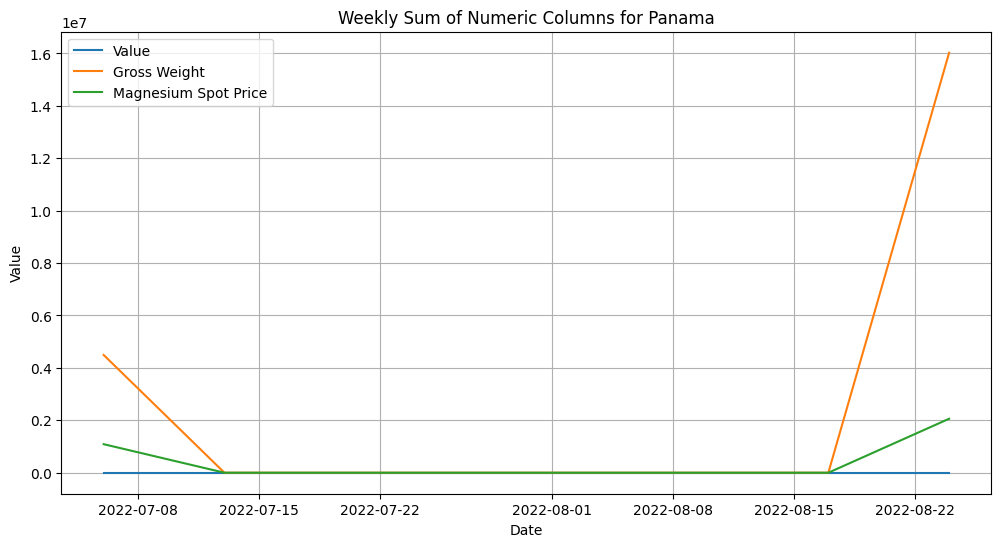

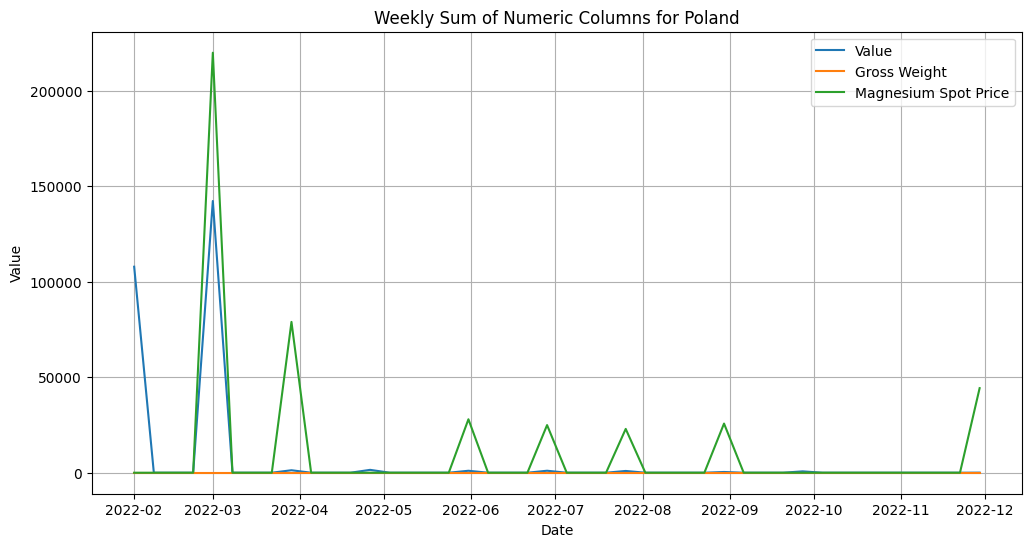

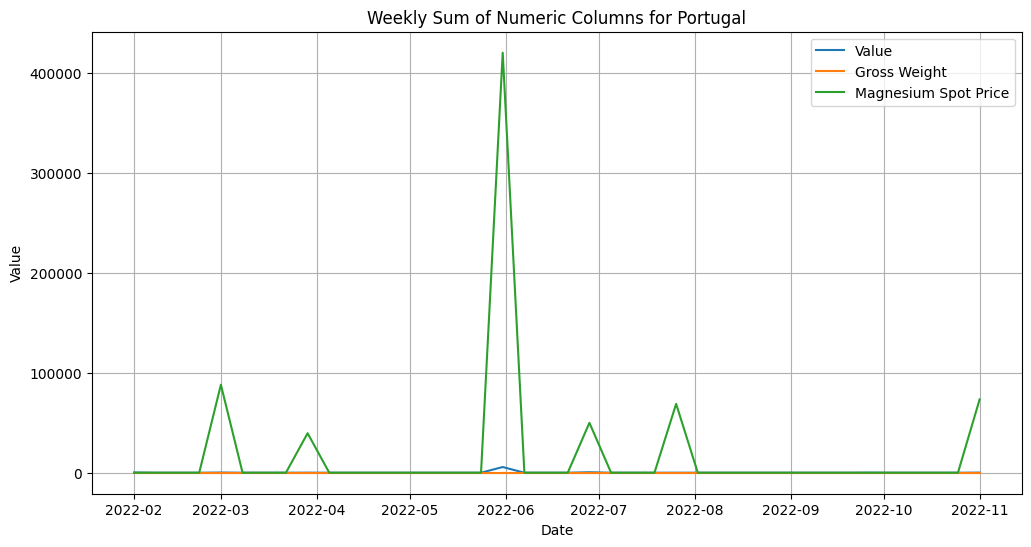

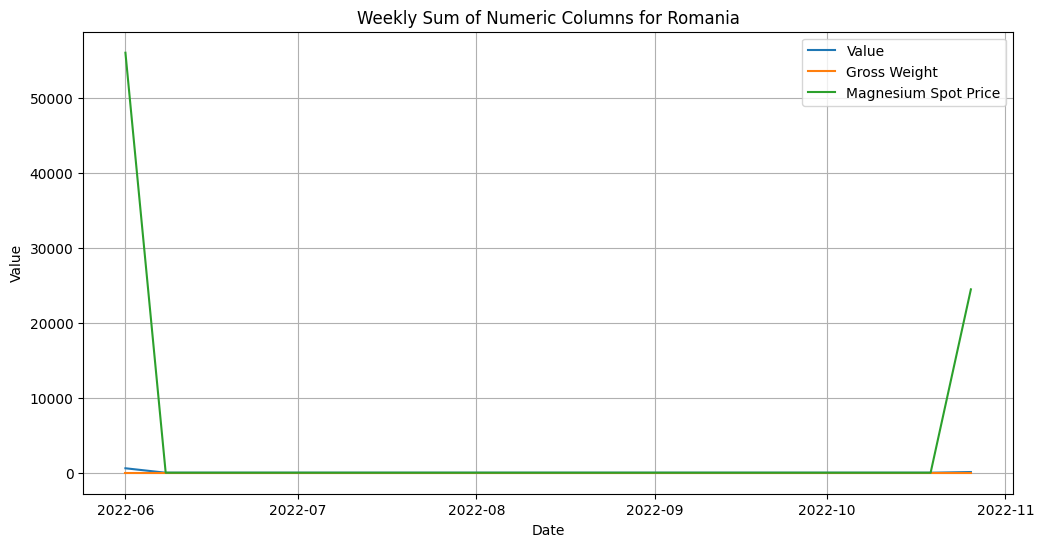

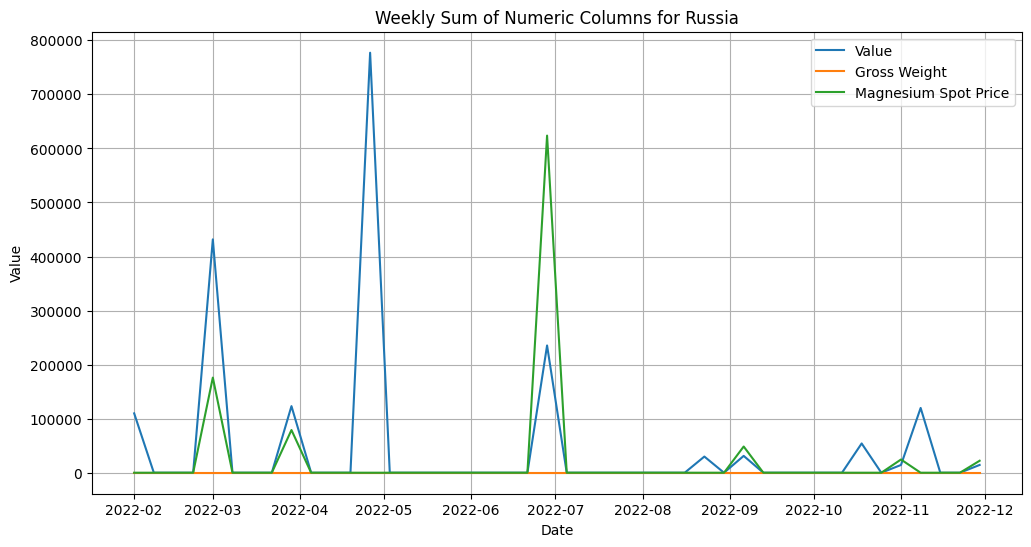

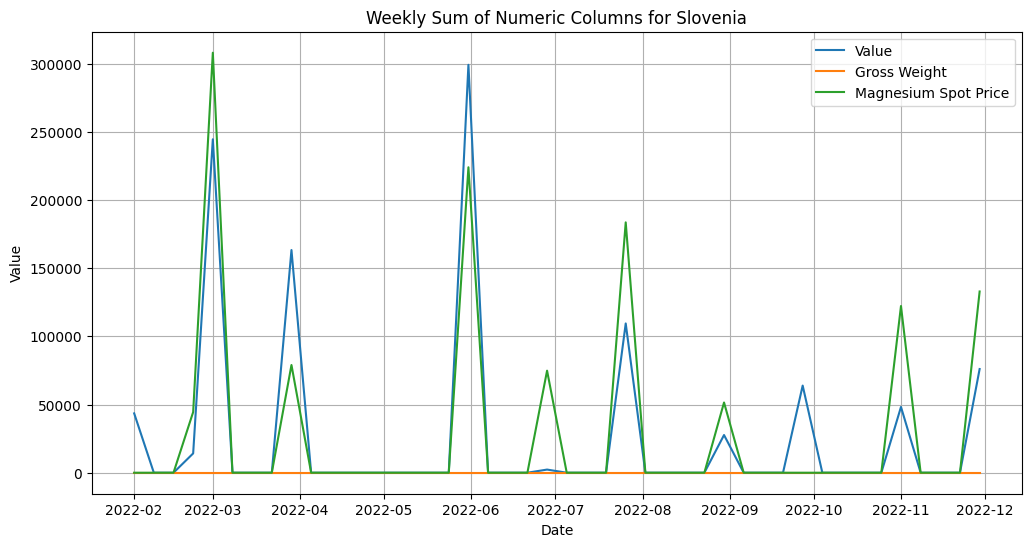

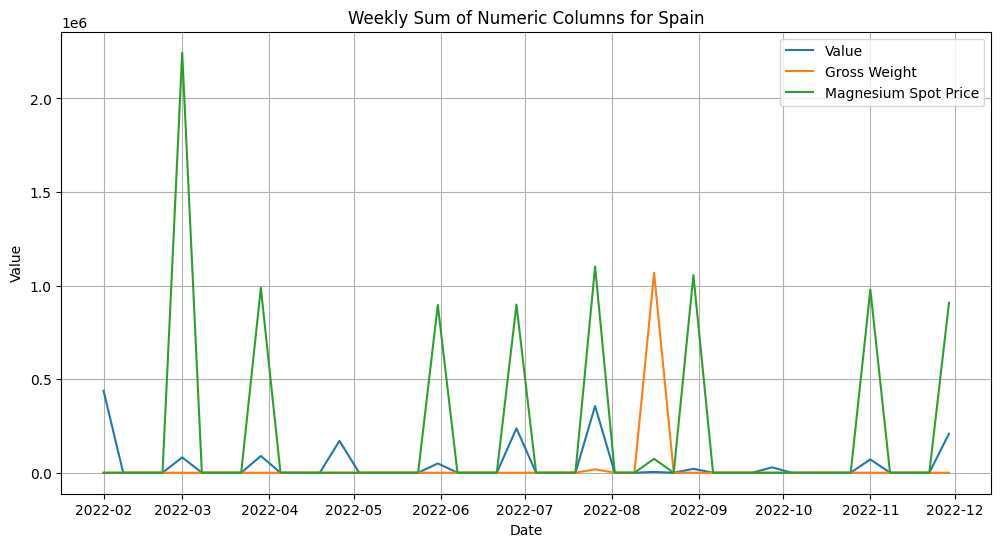

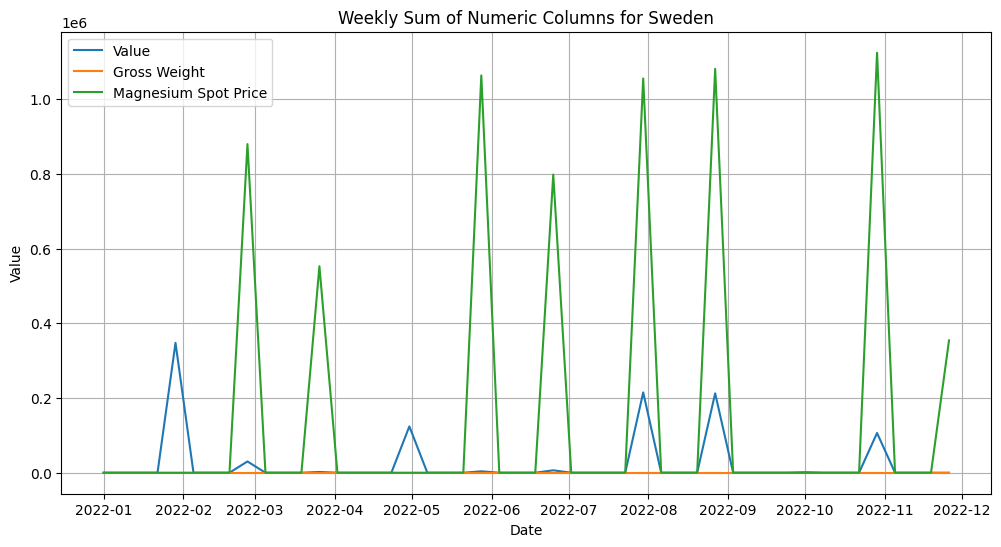

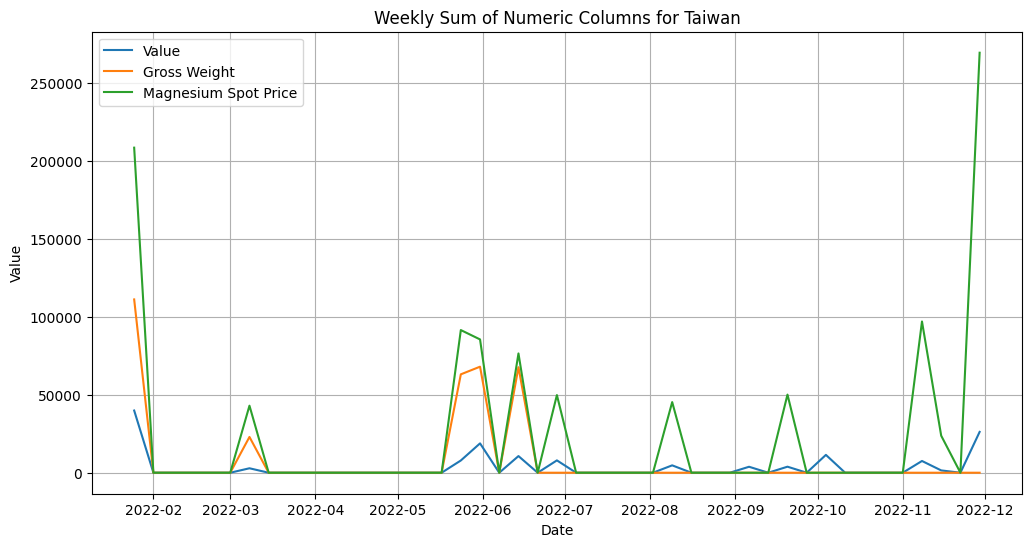

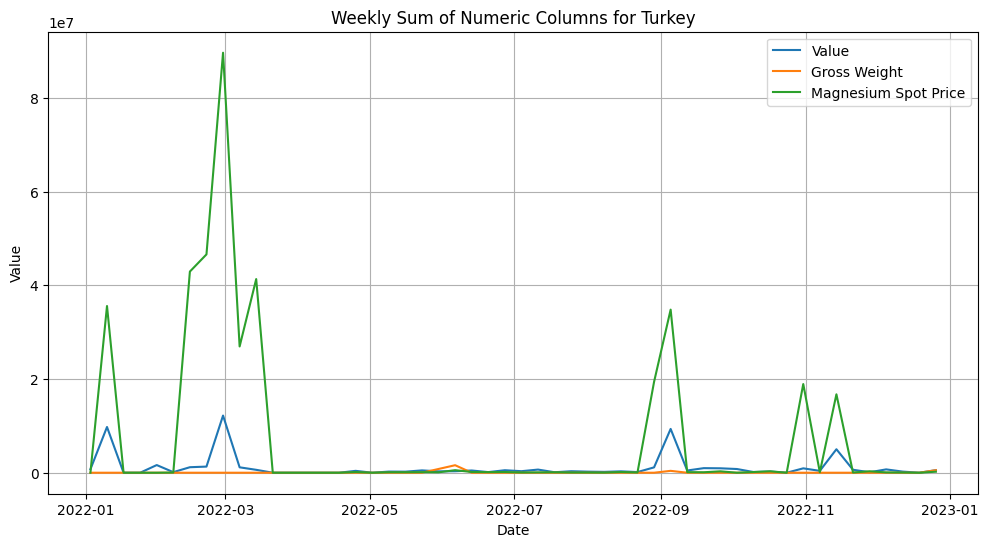

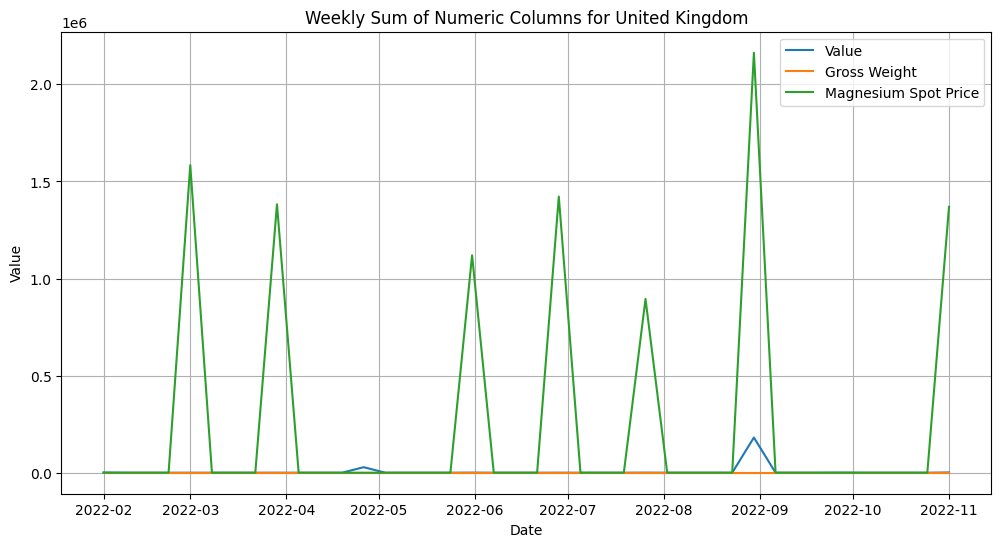

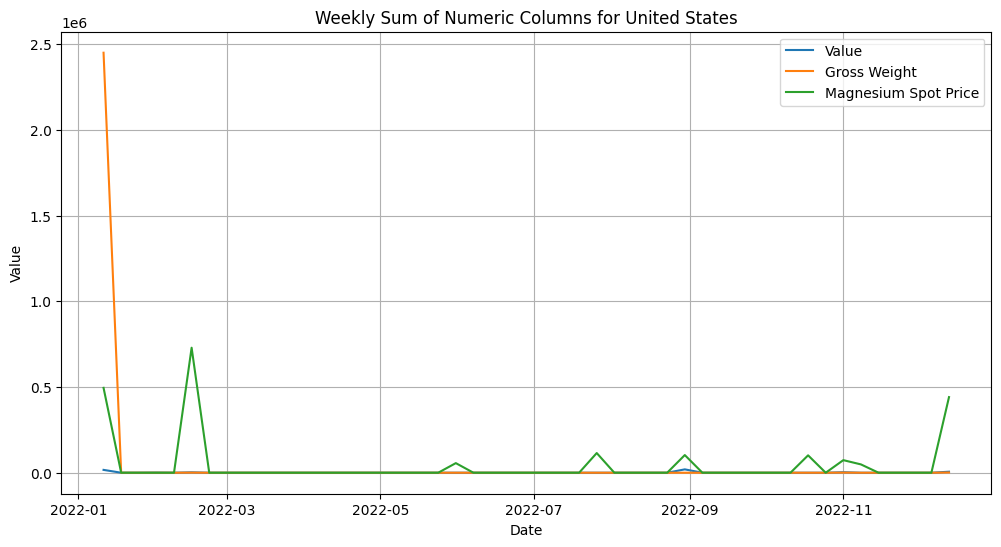

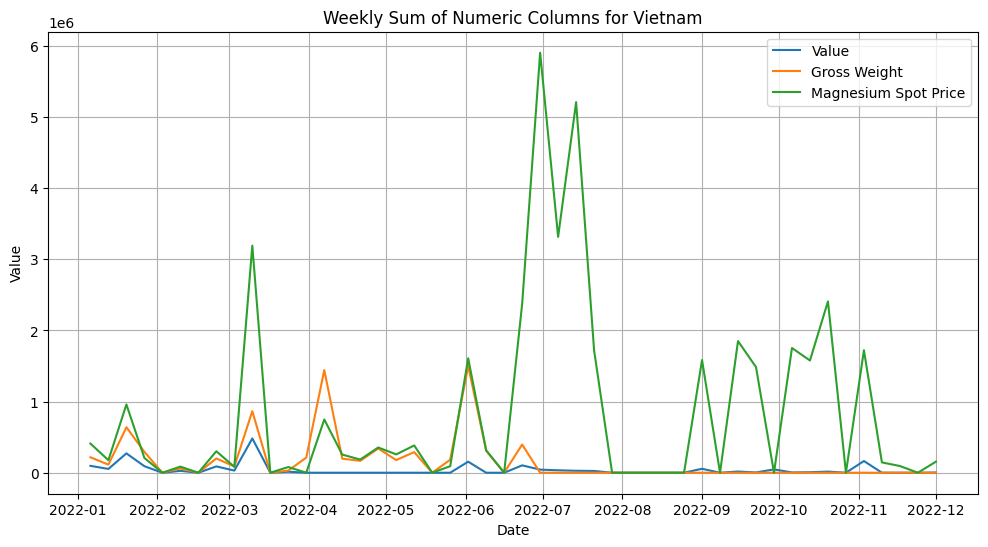

In [78]:
import matplotlib.pyplot as plt
NUMERIC_COLUMN = ['Value', 'Gross Weight', 'Magnesium Spot Price']

for country, group in combined_df:

    # Resample and sum
    weekly_data = group[NUMERIC_COLUMN].resample('7D').sum()

    scaling_factor = 1e1
    weekly_data['Value'] /= scaling_factor

    # Plotting
    plt.figure(figsize=(12, 6))
    for column in NUMERIC_COLUMN:
        plt.plot(weekly_data.index, weekly_data[column], label=column)

    plt.title(f'Weekly Sum of Numeric Columns for {country}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()